In [206]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_score, recall_score



In [207]:
#Read the dataset
iris_df = pd.read_csv("Iris.csv",index_col=0)
iris_df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [208]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [209]:
#Encoding the dependent variable y 'Iris-setosa' as 0 and all other variable as 1
iris_df['Species'] = np.where((iris_df.Species == 'Iris-setosa'),0,1)

iris_df['Species']

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    1
147    1
148    1
149    1
150    1
Name: Species, Length: 150, dtype: int32

In [210]:
#Independent variable assigned as x
X=iris_df.iloc[:,[0,1,2,3]].values
X = X.reshape(-1, 4)

In [211]:
#Dependent variable assigned as y
y = iris_df.iloc[:,[4]].values
y = y.reshape(-1, 1)

### Split the data into train and test

In [212]:
#Spliting the dataset as train and test set

X = preprocessing.scale(X) #scale the data so that it is easier to fit

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


### Fit the model and make prediction on test set

In [213]:
# fit a model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [214]:
# Use score method to get accuracy of model
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))


Accuracy: 1.0


### Confusion Matrix

In [215]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[11,  0],
       [ 0, 19]], dtype=int64)

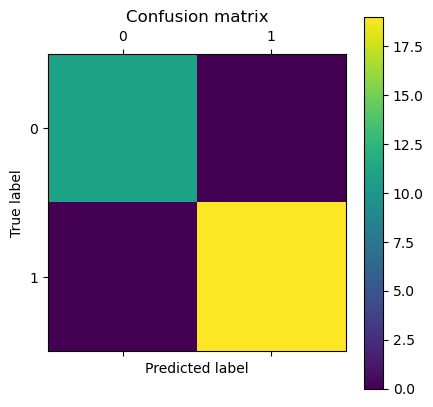

In [216]:
# Show confusion matrix in a separate window
plt.matshow(conf_mat)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

From the above confusion Matrix ,its clear that full green iris belong setosa and rest yellow predicts non-setosa

In [217]:
from sklearn.metrics import f1_score, precision_score, recall_score

# average f1 score
av_f1 = f1_score(y_test, y_pred, average='binary')
print('Average f1 score is:',av_f1)

# f1 score per class
f = f1_score(y_test, y_pred, average=None)
lowest_score = min(f)


Average f1 score is: 1.0


In [218]:
# precision and recall for ('Iris-setosa')
prec = precision_score(y_test == 0, y_pred == 0,average='binary')
rec = recall_score(y_test == 0, y_pred == 0,average='binary')

print('Precision:', prec)
print('Recall:', rec)

Precision: 1.0
Recall: 1.0


From the above information we can conclude that model is likely have similar Precision and similar Recall for Iris-setosa class.

In [220]:
#Calculating Accuracy , Precision , Recall
TP = 11 
TN = 19
FP = 0 
FN = 0

Accuracy = (TP + TN)/(TP+TN+FN+FP)

Precision = TP / (TP+FP)

Recall = TP / (TP+FN)

print(' Calculated Accuracy is :',Accuracy)
print(' Calculated Precision is :',Precision)
print(' Calculated Recall is :',Recall)

 Calculated Accuracy is : 1.0
 Calculated Precision is : 1.0
 Calculated Recall is : 1.0


By Calculating with the formula, the Accuracy,Precision and Recall seems to be similar